<a href="https://colab.research.google.com/github/dhyannn/reinforcment-learing/blob/main/514_RLlab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Policy: {0: 0, 1: 1, 2: 0}
Optimal Value Function: [53.23181049 48.39443672 43.76108396]


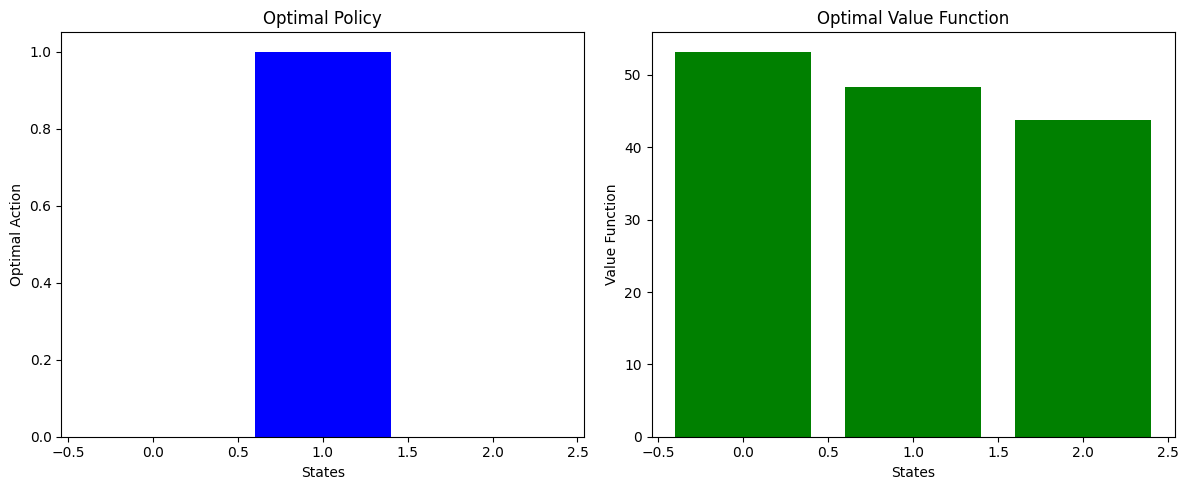

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class MDP:
    def __init__(self, states, actions, transition_probs, rewards, gamma):
        self.states = states             # List of all states
        self.actions = actions           # List of all actions
        self.transition_probs = transition_probs # Transition probabilities
        self.rewards = rewards           # Rewards
        self.gamma = gamma               # Discount factor
        self.policy = {s: actions[0] for s in states}  # Initialize policy

    def policy_evaluation(self, policy, theta=1e-6):
        V = np.zeros(len(self.states))  # Initialize value function for all states
        while True:
            delta = 0
            for s in self.states:
                v = V[s]
                a = policy[s]  # Take action based on current policy
                V[s] = sum([self.transition_probs.get(s, {}).get(a, {}).get(s_prime, 0) *
                            (self.rewards.get(s, {}).get(a, {}).get(s_prime, 0) + self.gamma * V[s_prime])
                            for s_prime in self.states])
                delta = max(delta, abs(v - V[s]))  # Check for convergence
            if delta < theta:  # Stop if converged
                break
        return V

    def policy_improvement(self, V):
        policy_stable = True
        for s in self.states:
            old_action = self.policy[s]
            action_values = []
            for a in self.actions:
                # Calculate action values with default transition probabilities and rewards if missing
                action_value = sum([self.transition_probs.get(s, {}).get(a, {}).get(s_prime, 0) *
                                    (self.rewards.get(s, {}).get(a, {}).get(s_prime, 0) + self.gamma * V[s_prime])
                                    for s_prime in self.states])
                action_values.append(action_value)
            best_action = self.actions[np.argmax(action_values)]
            self.policy[s] = best_action
            if old_action != best_action:
                policy_stable = False
        return policy_stable

    def policy_iteration(self):
        while True:
            V = self.policy_evaluation(self.policy)  # Evaluate the current policy
            policy_stable = self.policy_improvement(V)  # Improve the policy
            if policy_stable:  # Stop if policy is stable
                break
        return self.policy, V

# Example usage
states = [0, 1, 2]
actions = [0, 1]
transition_probs = {
    0: {0: {0: 0.5, 1: 0.5}, 1: {0: 0.7, 2: 0.3}},
    1: {0: {1: 1.0}, 1: {0: 0.4, 2: 0.6}},
    2: {0: {0: 0.3, 1: 0.7}, 1: {2: 1.0}}
}
rewards = {
    0: {0: {0: 5, 1: 10}, 1: {0: 0, 2: -1}},
    1: {0: {1: -1}, 1: {0: 2, 2: 8}},
    2: {0: {0: 1, 1: -2}, 1: {2: 3}}
}
gamma = 0.9

mdp = MDP(states, actions, transition_probs, rewards, gamma)
optimal_policy, optimal_value_function = mdp.policy_iteration()

# Print results
print("Optimal Policy:", optimal_policy)
print("Optimal Value Function:", optimal_value_function)

# Plotting Optimal Policy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(optimal_policy.keys(), optimal_policy.values(), color='blue')
plt.xlabel('States')
plt.ylabel('Optimal Action')
plt.title('Optimal Policy')

# Plotting Value Function
plt.subplot(1, 2, 2)
plt.bar(states, optimal_value_function, color='green')
plt.xlabel('States')
plt.ylabel('Value Function')
plt.title('Optimal Value Function')

# Display the plots
plt.tight_layout()
plt.show()
